In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [34]:
df = pd.read_csv("pokemon.csv")

In [35]:
df.head()

number                 name  type1   type2  total  hp  attack  defense  \
0       1            Bulbasaur  Grass  Poison    318  45      49       49   
1       2              Ivysaur  Grass  Poison    405  60      62       63   
2       3             Venusaur  Grass  Poison    525  80      82       83   
3       3        Mega Venusaur  Grass  Poison    625  80     100      123   
4       3  Gigantamax Venusaur  Grass  Poison    525  80      82       83   

   sp_attack  sp_defense  speed  generation  legendary  
0         65          65     45           1      False  
1         80          80     60           1      False  
2        100         100     80           1      False  
3        122         120     80           1      False  
4        100         100     80           1      False

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1072 entries, 0 to 1071
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   number      1072 non-null   int64 
 1   name        1072 non-null   object
 2   type1       1072 non-null   object
 3   type2       574 non-null    object
 4   total       1072 non-null   int64 
 5   hp          1072 non-null   int64 
 6   attack      1072 non-null   int64 
 7   defense     1072 non-null   int64 
 8   sp_attack   1072 non-null   int64 
 9   sp_defense  1072 non-null   int64 
 10  speed       1072 non-null   int64 
 11  generation  1072 non-null   int64 
 12  legendary   1072 non-null   bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 101.7+ KB


In [37]:
df.isna().sum()

number          0
name            0
type1           0
type2         498
total           0
hp              0
attack          0
defense         0
sp_attack       0
sp_defense      0
speed           0
generation      0
legendary       0
dtype: int64

In [38]:
df["legendary"].unique()

array([False,  True])

In [39]:
map_legend = {
    True  : 1,
    False : 0
}

In [40]:
df["legendary"] = df["legendary"].map(map_legend)

In [41]:
df.iloc[140:155]

number              name     type1    type2  total   hp  attack  defense  \
140     101         Electrode  Electric      NaN    480   60      50       70   
141     102         Exeggcute     Grass  Psychic    325   60      40       80   
142     103         Exeggutor     Grass  Psychic    520   95      95       85   
143     103  Alolan Exeggutor     Grass   Dragon    530   95     105       85   
144     104            Cubone    Ground      NaN    320   50      50       95   
145     105           Marowak    Ground      NaN    425   60      80      110   
146     105    Alolan Marowak      Fire    Ghost    425   60      80      110   
147     106         Hitmonlee  Fighting      NaN    455   50     120       53   
148     107        Hitmonchan  Fighting      NaN    455   50     105       79   
149     108         Lickitung    Normal      NaN    385   90      55       75   
150     109           Koffing    Poison      NaN    340   40      65       95   
151     110           Weezing    Poison      NaN    490   65      90      120   
152     110  Galarian Weezing    Poison    Fairy    490   65      90      120   
153     111           Rhyhorn    Ground     Rock    345   80      85       95   
154     112            Rhydon    Ground     Rock    485  105     130      120   

     sp_attack  sp_defense  speed  generation  legendary  
140         80          80    140           1          0  
141         60          45     40           1          0  
142        125          65     55           1          0  
143        125          75     45           7          0  
144         40          50     35           1          0  
145         50          80     45           1          0  
146         50          80     45           7          0  
147         35         110     87           1          0  
148         35         110     76           1          0  
149         60          75     30           1          0  
150         60          45     35           1          0  
151         85          70     60           1          0  
152         85          70     60           8          0  
153         30          30     25           1          0  
154         45          45     40           1          0

## Visualization

<Axes: xlabel='total', ylabel='legendary'>

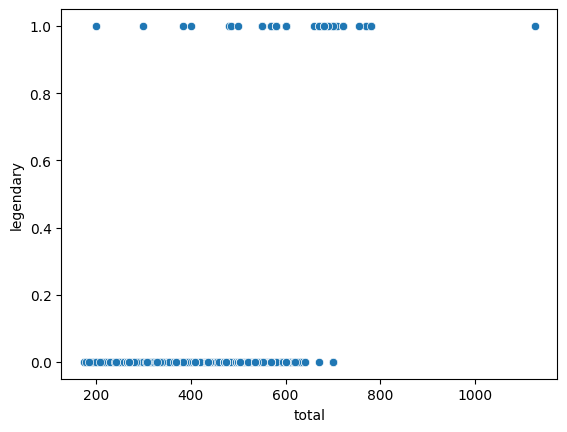

In [42]:
sbn.scatterplot(x = "total",y = "legendary",data = df)

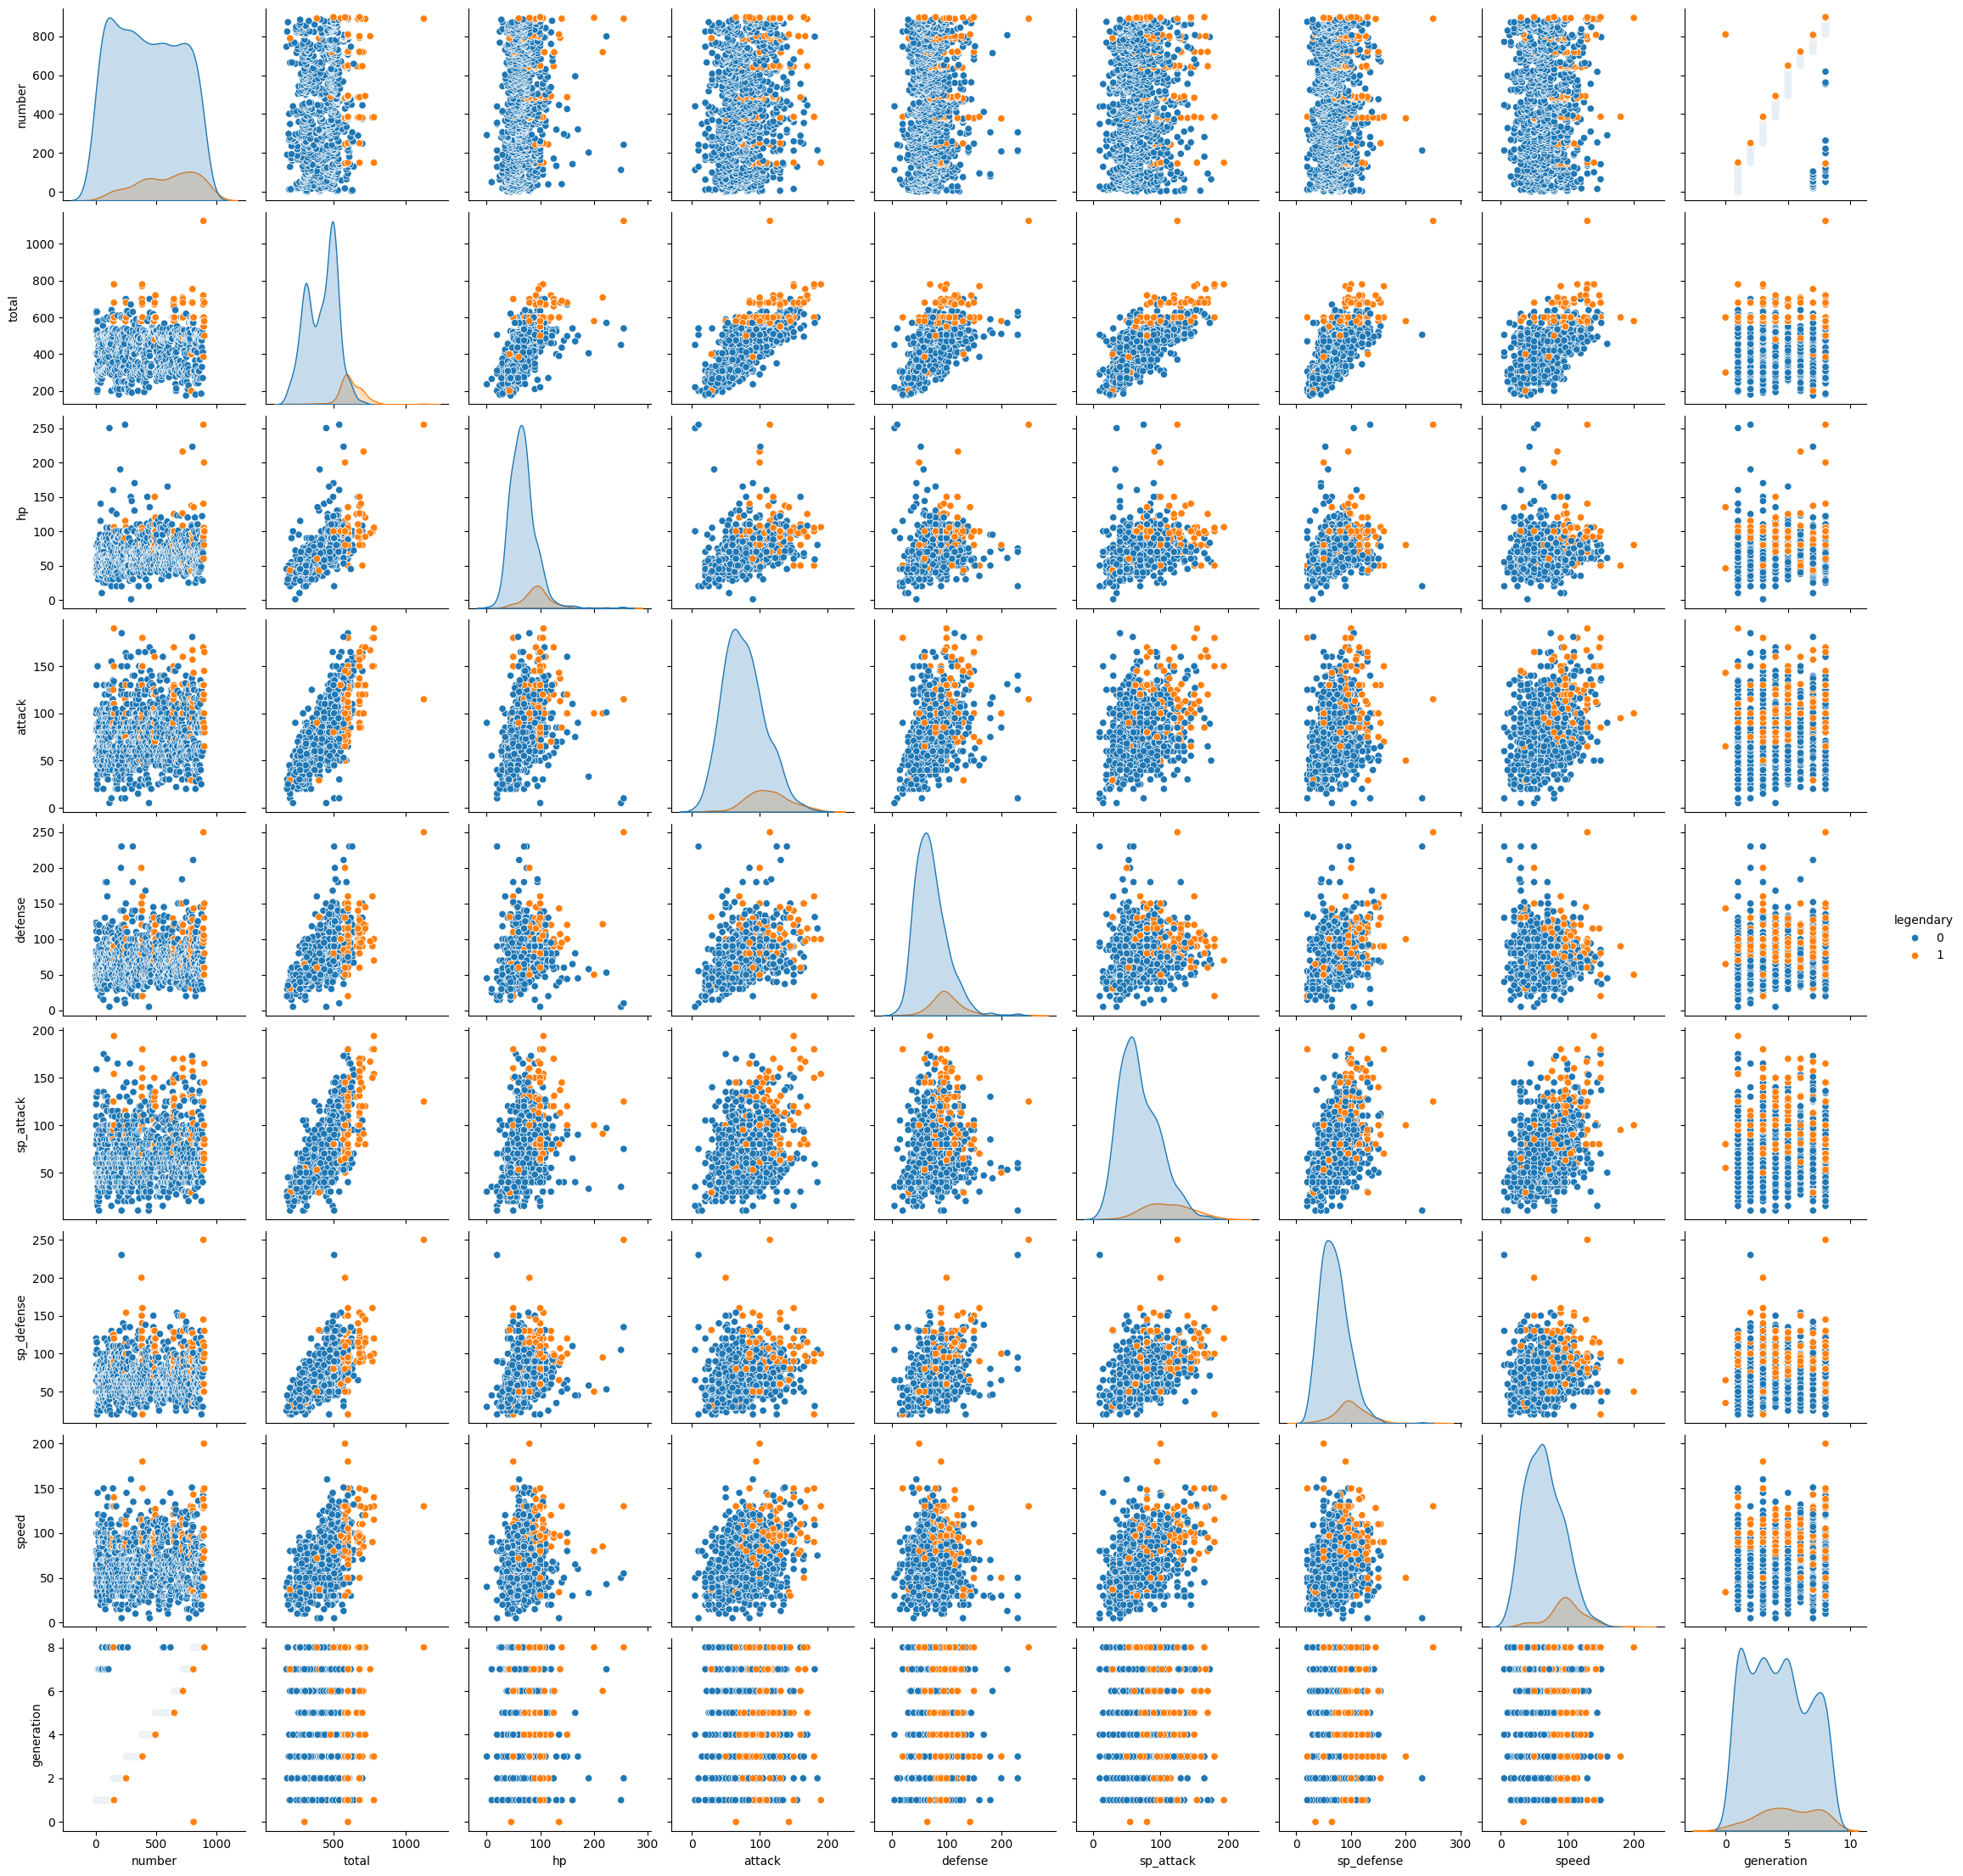

In [43]:
sbn.pairplot(df,hue="legendary")

In [44]:
df[df["legendary"] == 1].value_counts("type1")

type1
Psychic     30
Dragon      15
Water        9
Fighting     9
Steel        8
Electric     7
Fire         5
Dark         5
Normal       4
Rock         4
Grass        4
Ground       4
Ice          3
Ghost        3
Fairy        3
Poison       2
Flying       2
Bug          1
Name: count, dtype: int64

In [46]:
df[df["legendary"] == 0].value_counts("type1")

type1
Water        127
Normal       113
Grass         90
Bug           82
Fire          62
Rock          56
Electric      56
Psychic       50
Dark          43
Poison        40
Ghost         40
Ground        38
Fighting      36
Ice           35
Steel         31
Dragon        26
Fairy         20
Flying         7
Blastoise      1
Graass         1
Name: count, dtype: int64

In [47]:
df[df["legendary"] == 0].value_counts("type2")

type2
Flying      98
Poison      41
Fairy       37
Psychic     37
Ground      36
Steel       30
Dragon      28
Grass       25
Fighting    25
Dark        25
Ghost       21
Water       19
Rock        16
Ice         15
Fire        15
Normal      11
Electric    10
Bug         10
Name: count, dtype: int64

In [53]:
df = df.drop("number",axis=1)

<Axes: >

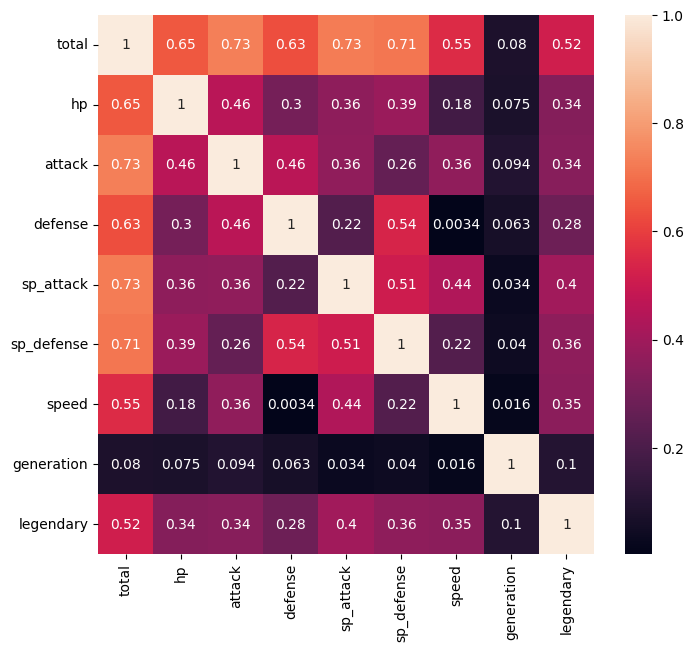

In [54]:
plt.figure(figsize=(8,7))
sbn.heatmap(df.corr(numeric_only=True),annot=True)

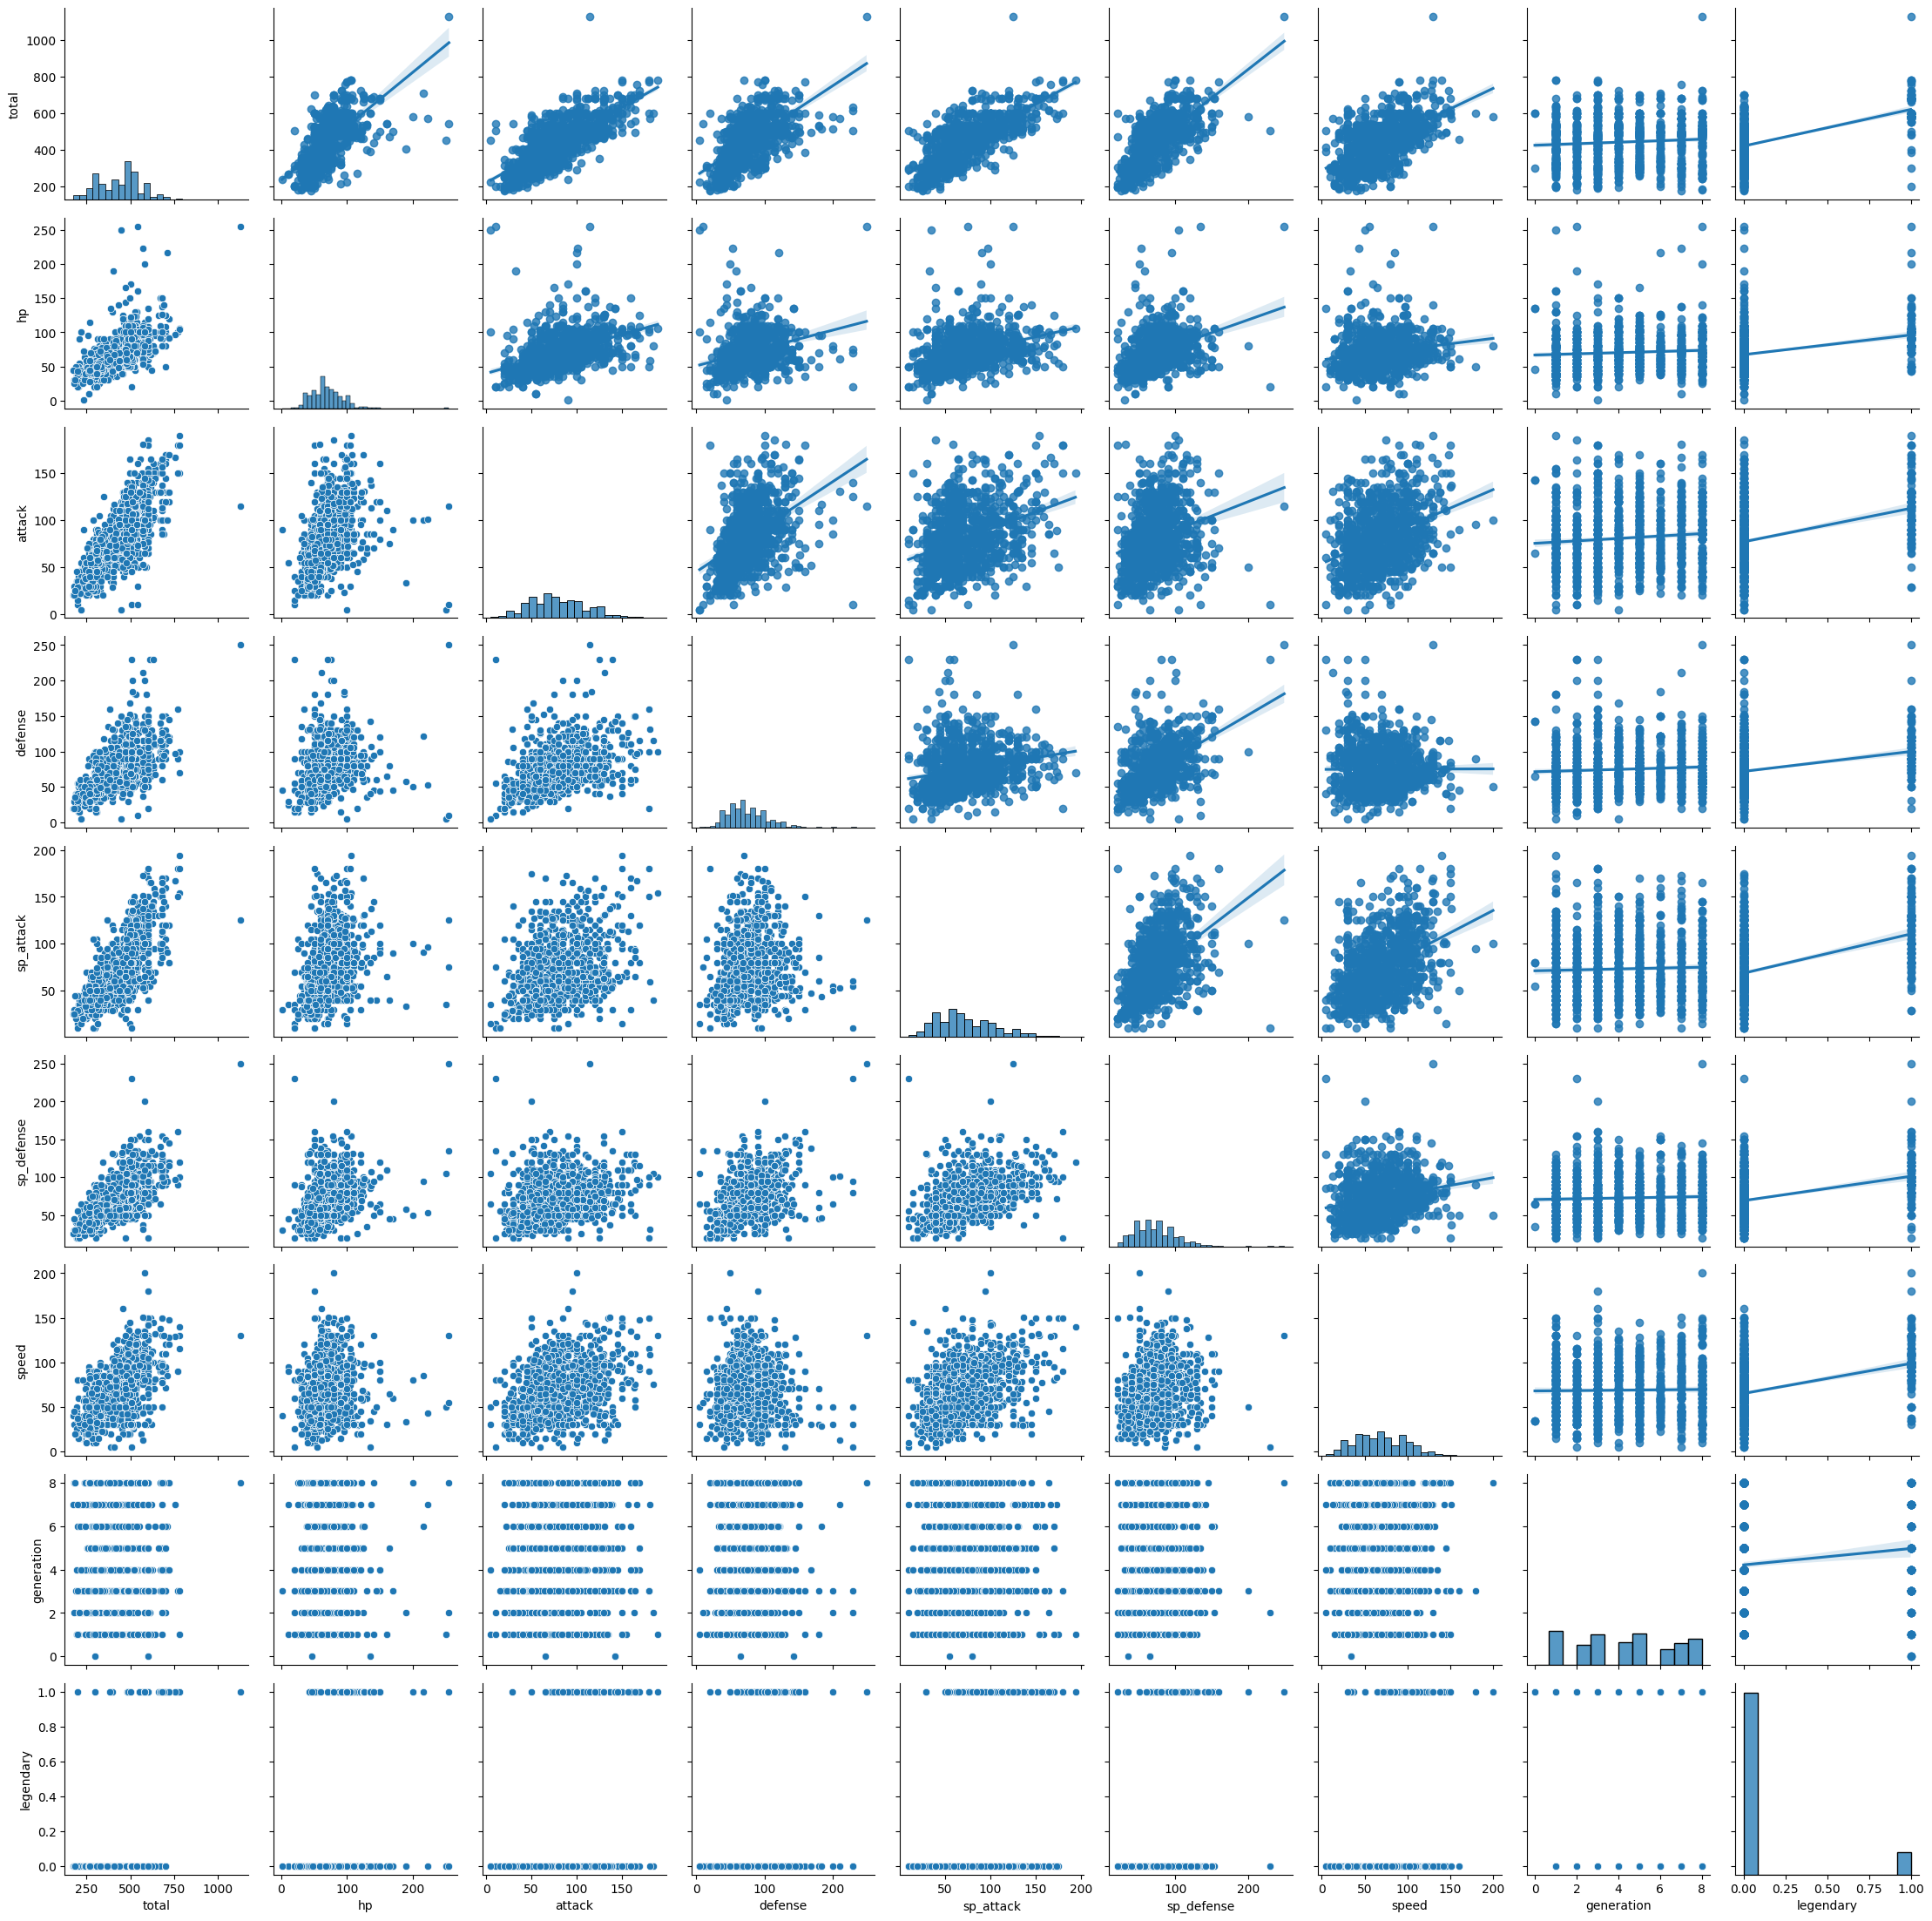

In [55]:
g = sbn.PairGrid(df)
g.map_upper(sbn.regplot)
g.map_diag(sbn.histplot)
g.map_lower(sbn.scatterplot)

## Data Preparation

In [56]:
X = df.drop(["legendary","name"],axis=1)

In [57]:
X = pd.get_dummies(X,drop_first=True)

In [58]:
X

total   hp  attack  defense  sp_attack  sp_defense  speed  generation  \
0       318   45      49       49         65          65     45           1   
1       405   60      62       63         80          80     60           1   
2       525   80      82       83        100         100     80           1   
3       625   80     100      123        122         120     80           1   
4       525   80      82       83        100         100     80           1   
...     ...  ...     ...      ...        ...         ...    ...         ...   
1067    580  100     145      130         65         110     30           8   
1068    580  100      65       60        145          80    130           8   
1069    500  100      80       80         80          80     80           8   
1070    680  100     165      150         85         130     50           8   
1071    680  100      85       80        165         100    150           8   

      type1_Bug  type1_Dark  ...  type2_Ghost  type2_Grass  type2_Ground  \
0         False       False  ...        False        False         False   
1         False       False  ...        False        False         False   
2         False       False  ...        False        False         False   
3         False       False  ...        False        False         False   
4         False       False  ...        False        False         False   
...         ...         ...  ...          ...          ...           ...   
1067      False       False  ...        False        False         False   
1068      False       False  ...        False        False         False   
1069      False       False  ...        False         True         False   
1070      False       False  ...        False        False         False   
1071      False       False  ...         True        False         False   

      type2_Ice  type2_Normal  type2_Poison  type2_Psychic  type2_Rock  \
0         False         False          True          False       False   
1         False         False          True          False       False   
2         False         False          True          False       False   
3         False         False          True          False       False   
4         False         False          True          False       False   
...         ...           ...           ...            ...         ...   
1067      False         False         False          False       False   
1068      False         False         False          False       False   
1069      False         False         False          False       False   
1070       True         False         False          False       False   
1071      False         False         False          False       False   

      type2_Steel  type2_Water  
0           False        False  
1           False        False  
2           False        False  
3           False        False  
4           False        False  
...           ...          ...  
1067        False        False  
1068        False        False  
1069        False        False  
1070        False        False  
1071        False        False  

[1072 rows x 44 columns]

In [59]:
y = df["legendary"]

In [60]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1067    1
1068    1
1069    1
1070    1
1071    1
Name: legendary, Length: 1072, dtype: int64

## ML Model

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [62]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=9,test_size=0.4)

In [63]:
scaler = StandardScaler()

In [64]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model 1 Decision Tree

In [65]:
from sklearn.tree import DecisionTreeClassifier

In [79]:
dec_tree = DecisionTreeClassifier(random_state=99)

In [80]:
dec_tree.fit(X_train,y_train)


DecisionTreeClassifier(random_state=99)

In [81]:
poke_pred_1 = dec_tree.predict(X_test)

## Evaluation of Decision Tree Model

In [82]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay,classification_report

In [83]:
confusion_matrix(y_test,poke_pred_1)

array([[367,  14],
       [ 12,  36]])

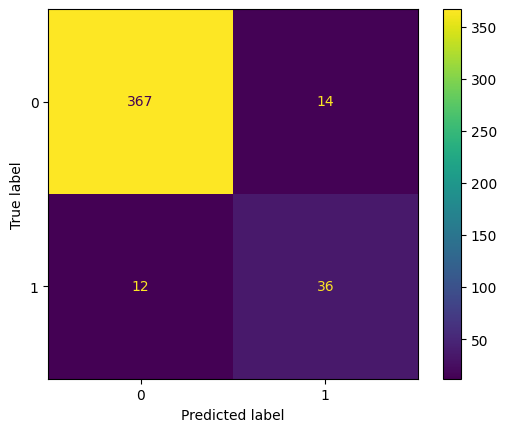

In [84]:
ConfusionMatrixDisplay.from_estimator(dec_tree,X_test,y_test)

In [85]:
print(classification_report(y_test,poke_pred_1))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       381
           1       0.72      0.75      0.73        48

    accuracy                           0.94       429
   macro avg       0.84      0.86      0.85       429
weighted avg       0.94      0.94      0.94       429



In [86]:
y_test.value_counts()

legendary
0    381
1     48
Name: count, dtype: int64

In [87]:
48/381

0.12598425196850394

In [88]:
from sklearn.tree import plot_tree

[Text(0.46875, 0.9444444444444444, 'total <= 1.122\ngini = 0.194\nsamples = 643\nvalue = [573, 70]'),
 Text(0.23214285714285715, 0.8333333333333334, 'total <= 0.894\ngini = 0.028\nsamples = 556\nvalue = [548, 8]'),
 Text(0.3504464285714286, 0.8888888888888888, 'True  '),
 Text(0.10714285714285714, 0.7222222222222222, 'generation <= -1.605\ngini = 0.011\nsamples = 539\nvalue = [536, 3]'),
 Text(0.07142857142857142, 0.6111111111111112, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.14285714285714285, 0.6111111111111112, 'total <= -1.968\ngini = 0.007\nsamples = 538\nvalue = [536, 2]'),
 Text(0.07142857142857142, 0.5, 'type1_Psychic <= 1.537\ngini = 0.198\nsamples = 9\nvalue = [8, 1]'),
 Text(0.03571428571428571, 0.3888888888888889, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.10714285714285714, 0.3888888888888889, 'generation <= 0.3\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.07142857142857142, 0.2777777777777778, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.14

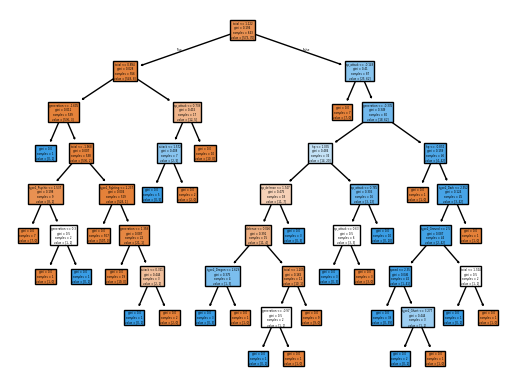

In [89]:
plot_tree(dec_tree,filled=True,feature_names=X.columns)

## Random Forest Model

In [90]:
from sklearn.ensemble import RandomForestClassifier

In [98]:
random_1 = RandomForestClassifier(max_features=7,n_estimators=3,random_state=9)

In [93]:
random_1

RandomForestClassifier(max_features=7, n_estimators=3)

In [99]:
random_1.fit(X_train,y_train)
poke_pred_2 = random_1.predict(X_test)

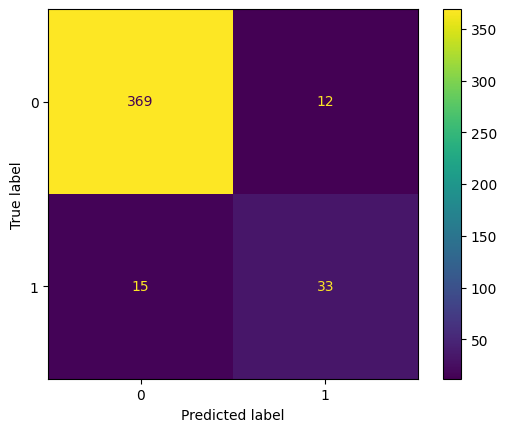

In [100]:
ConfusionMatrixDisplay.from_estimator(random_1,X_test,y_test)

In [101]:
print(classification_report(y_test,poke_pred_2))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       381
           1       0.73      0.69      0.71        48

    accuracy                           0.94       429
   macro avg       0.85      0.83      0.84       429
weighted avg       0.94      0.94      0.94       429



In [102]:
from sklearn.model_selection import GridSearchCV

In [103]:
n_est = [5,11,32,64,128]
max_feat = [4,5,9,12,15]

In [104]:
parameters = {
    "n_estimators" : n_est,
    "max_features" : max_feat
}

In [105]:
random_forest = RandomForestClassifier(random_state=9)
grid = GridSearchCV(random_forest,parameters)

In [106]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=9),
             param_grid={'max_features': [4, 5, 9, 12, 15],
                         'n_estimators': [5, 11, 32, 64, 128]})

In [107]:
poke_pred_3 = grid.predict(X_test)

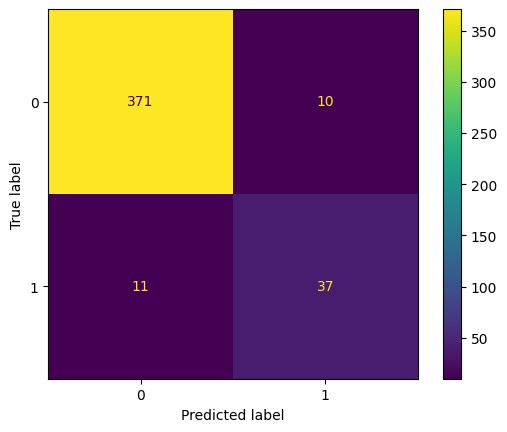

In [108]:
ConfusionMatrixDisplay.from_estimator(grid,X_test,y_test)


In [109]:
print(classification_report(y_test,poke_pred_3))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       381
           1       0.79      0.77      0.78        48

    accuracy                           0.95       429
   macro avg       0.88      0.87      0.88       429
weighted avg       0.95      0.95      0.95       429

